In [2]:
from LHEImport.LHEImport2 import read_lhe, tohdf5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vector
# plt styles
plt.style.use(["science", "grid", "high-contrast"])
plt.rcParams.update({"font.family":"serif", "font.size":20, "figure.figsize":[12,8]})


In [ ]:
# data = read_lhe('event_files/lhe/ttZ_events.lhe')
# data2 = read_lhe('event_files/lhe/ttZ_decayed.lhe')
# tohdf5(data, 'event_files/hdf5/ttZ', key='undecayed_limited', limit_events=True)
# tohdf5(data2, 'event_files/hdf5/ttZ', key='decayed_limited', limit_events=True)
# data3 = read_lhe('event_files/lhe/ttZ_events.lhe')
# tohdf5(data3,'event_files/hdf5/ttZ_weighttest', key='weights_unlimited', limit_events=False)

In [ ]:
# tohdf5(data, 'ttz_events_newimport', key='limited', limit_events=True)

In [ ]:
df = pd.read_hdf('event_files/hdf5/ttZ.h5', 'undecayed_limited')
# df = pd.read_hdf('event_files/hdf5/ttZ_weighttest.h5', 'weights_unlimited')

In [3]:
def deltaphi_tops(particles):
    tops=[]
    for p in particles:
        if p.id==6 or p.id==-6:
            tops.append(p)
    return tops[0].fourvec.deltaphi(tops[1].fourvec)
    

def ptot2(particles):
    fourvecs=vector.obj(px=0, py=0, pz=0, E=0)
    for p in particles: 
        fourvecs += p.fourvec
    return fourvecs.pt

In [ ]:
df['delta_phi'] = df.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df['ptotal'] = df.apply(lambda r: ptot2(r['particles']), axis=1)
df.head()

In [ ]:
all_pdgids = []
for particle in df['particles'][0]:
    if particle.pdgid not in all_pdgids and not particle.pdgid==21:
        all_pdgids.append(particle.pdgid)
all_weights=[]
for weight in df['weights']:
     all_weights.append(weight['1'])
fig, axes = plt.subplots(2,2)
for param, ax in zip(["pt", "eta", "phi", "e" ], axes.flatten()):
#     pdgids = np.array([6,-6,23])
    pdgids = np.array(all_pdgids)
    for pdgid in pdgids: 
        vals=[]
        for ind, row in df.iterrows():
            for particle in row.particles:
                if particle.pdgid==pdgid:
                    vals.append(getattr(particle, param))
        ax.hist(vals,histtype='step', bins=20, label=f"{pdgid}", 
                weights=all_weights
               )
    if param=='e':
        ax.set_title("Energy")
        ax.set_xlabel('Energy $[$GeV$]$', loc='right', fontsize=18)
    elif param=='pt':
        ax.set_title("Transverse Momentum - $p_T$")
        ax.set_xlabel('$p_t$ $[$GeV$]$', loc='right', fontsize=18)
    elif param =='phi':
        ax.title.set_text("Azimuthal angle - $\phi$")
        ax.set_xlabel('$\phi$', loc='right', fontsize=18)
    elif param =='eta':
        ax.title.set_text("Pseudo-rapidity - $\eta$")
        ax.set_xlabel('$\eta$', loc='right', fontsize=18)
    handles, labels = ax.get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, loc='lower left', fontsize=16, facecolor='white')


fig2, axes2 = plt.subplots(1,2)
axes2[0].hist(df['delta_phi'], histtype='step', bins=20)
axes2[0].title.set_text('$\delta \phi$ for $t \\bar{t}$')
axes2[0].set_xlabel('$\delta \phi$')

axes2[1].hist(df['ptotal'], histtype='step', bins=20)
axes2[1].title.set_text("$p_{\mathrm{T}}$ for combined $t \\bar{t} Z$")
axes2[1].set_xlabel('$p_{\mathrm{T}} [\\text{GeV}]$')
fig2.tight_layout()
plt.show()

## Notes
What do we see
- A correlation between the Energy and transverse momentum. 
- In the azimuthal angle there is an even distribution between $[-\pi, \pi]$
- The total momentum of the $t\bar{t}z$ system is zero
- Pseudorapidity is distributed about 0 

In [ ]:
# With madspin enabled

In [ ]:
df2 = pd.read_hdf('event_files/hdf5/ttZ.h5', 'decayed_limited')
 

In [ ]:
df2['delta_phi'] = df2.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df2['ptotal'] = df2.apply(lambda r: ptot2(r['particles']), axis=1)

In [ ]:
# all_pdgids = []
# for particle in df2['particles'][0]:
#     if not (particle.status==1) and not particle.pdgid in all_pdgids: 
#         all_pdgids.append(particle.pdgid)
# print(all_pdgids)
particles=[]
for index, row in df2.iterrows():
    for particle in row.particles: 
        particles.append(particle)
print(len(particles))
df_particles = pd.DataFrame.from_dict(particle.__dict__ for particle in particles)
all_pdgids = []
for index, row in df_particles.iterrows():
    if row.pdgid not in all_pdgids and row.status==1 and row.m!=0:
        all_pdgids.append(row.pdgid)
print(all_pdgids)

In [ ]:
issue_pdgids=[2,-1]
some_pdgids = [5,6,-24,13, -14,11]
fig, axes = plt.subplots(2,2)
for param, ax in zip(["pt", "eta", "phi", "e" ], axes.flatten()):
#     pdgids = np.array([6,-6,23])
    for pdgid in all_pdgids: 
        vals=[]
        for ind, row in df2.iterrows():
            for particle in row.particles:
                if particle.pdgid==pdgid and particle.m!=0:
                    vals.append(float(getattr(particle, param)))
        ax.hist(vals,histtype='step', bins=10, label=f"{pdgid}")
    if param=='e':
        ax.set_title("Energy")
        ax.set_xlabel('Energy $[$GeV$]$', loc='right', fontsize=18)
    elif param=='pt':
        ax.set_title("Transverse Momentum - $p_T$")
        ax.set_xlabel('$p_t$ $[$GeV$]$', loc='right', fontsize=18)
    elif param =='phi':
        ax.title.set_text("Azimuthal angle - $\phi$")
        ax.set_xlabel('$\phi$', loc='right', fontsize=18)
    elif param =='eta':
        ax.title.set_text("Pseudo-rapidity - $\eta$")
        ax.set_xlabel('$\eta$', loc='right', fontsize=18)
    handles, labels = ax.get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, loc='lower left', fontsize=16, facecolor='white')
    
fig2, axes2 = plt.subplots(1,2)
axes2[0].hist(df2['delta_phi'], histtype='step', bins=10)
axes2[0].title.set_text('$\delta \phi$ for $t \\bar{t}$')
axes2[0].set_xlabel('$\delta \phi$')

axes2[1].hist(df2['ptotal'], histtype='step', bins=10)
axes2[1].title.set_text("$p_{\mathrm{T}}$ for combined $t \\bar{t} Z$")
axes2[1].set_xlabel('$p_{\mathrm{T}} [\\text{GeV}]$')
fig2.tight_layout()
plt.show()

In [2]:
data = read_lhe('event_files/lhe/ttZ_we_zmumu_undecayed.lhe')
data2 = read_lhe('event_files/lhe/ttZ_we_zmumu_decayed.lhe')
tohdf5(data, 'event_files/hdf5/ttZ_we_zmumu', key='undecayed_limited', limit_events=False)
tohdf5(data2, 'event_files/hdf5/ttZ_we_zmumu', key='decayed_limited', limit_events=False)

/home/craig/.local/lib/python3.9/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['event_info', 'particles', 'weights'], dtype='object')]

  pytables.to_hdf(


In [4]:
df_undecayed = pd.read_hdf('event_files/hdf5/ttZ_we_zmumu.h5', 'undecayed_limited')
df_decayed = pd.read_hdf('event_files/hdf5/ttZ_we_zmumu.h5', 'decayed_limited')

In [5]:

df_undecayed['delta_phi'] = df_undecayed.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df_undecayed['ptotal'] = df_undecayed.apply(lambda r: ptot2(r['particles']), axis=1)

df_decayed['delta_phi'] = df_decayed.apply(lambda r: deltaphi_tops(r['particles']), axis=1)
df_decayed['ptotal'] = df_decayed.apply(lambda r: ptot2(r['particles']), axis=1)

In [ ]:
df_decayed.head()

In [17]:
particles_decayed=[]
for index, row in df_decayed.iterrows():
    for particle in row.particles: 
        particles_decayed.append(particle)
df_particles_decayed = pd.DataFrame.from_dict(particle.__dict__ for particle in particles_decayed)
all_pdgids_decayed = []
for index, row in df_particles_decayed.iterrows():
    if row.pdgid not in all_pdgids_decayed and row.status==1:
        all_pdgids_decayed.append(row.pdgid)
print(all_pdgids_decayed)

[5, -11, 12, -5, 1, -2, -13, 13, 3, -4]


In [6]:
particles_undecayed=[]
for index, row in df_undecayed.iterrows():
    for particle in row.particles: 
        particles_undecayed.append(particle)
df_particles_undecayed = pd.DataFrame.from_dict(particle.__dict__ for particle in particles_undecayed)
all_pdgids_undecayed = []
for index, row in df_particles_undecayed.iterrows():
    if row.pdgid not in all_pdgids_undecayed and row.status==1:
        all_pdgids_undecayed.append(row.pdgid)
print(all_pdgids_undecayed)

[6, -6, 23]


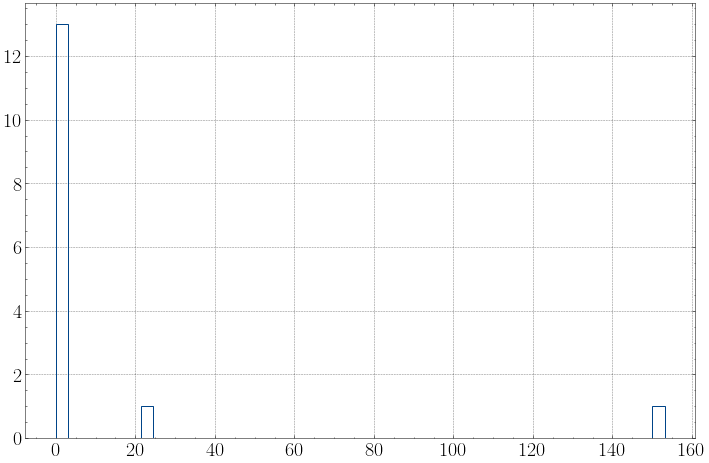

In [10]:
#     pdgids = np.array([6,-6,23])
for ind, row in df_decayed.iterrows():
    vals =[]
    for particle in row.particles:
        total = vector.obj(px=0, py=0, pz=0, E=0)
        if abs(particle.pdgid)==13:
            total += particle.fourvec
#         print(total)
        vals.append(total.pt)
plt.hist(vals,histtype='step', bins=50)
plt.show()